In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
df.duplicated().sum()

np.int64(723)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
age=df['age']
age.describe()

,age
count,302.00000
mean,54.42053
std,9.04797
min,29.00000
25%,48.00000
50%,55.50000
75%,61.00000
max,77.00000


In [12]:
age.median()

55.5

In [13]:
print(df['target'].value_counts())

target
1    164
0    138
Name: count, dtype: int64


/tmp/ipython-input-2691255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=["blue", "green"])


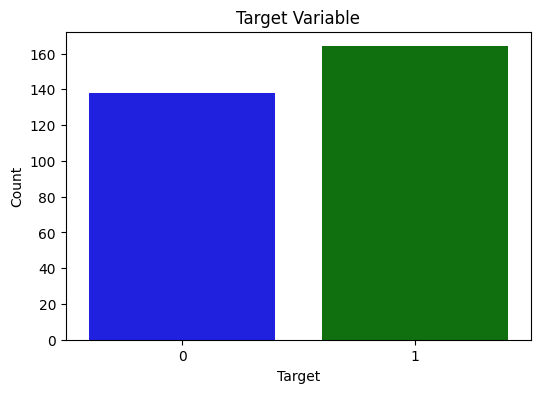

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette=["blue", "green"])
plt.title("Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

In [15]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca']

In [16]:
for col in num_cols:
  print(f"Value counts for {col}: \n{df[col].value_counts()}")

Value counts for age: 
age
58    19
57    17
54    16
59    14
52    13
51    12
60    11
62    11
44    11
56    11
64    10
41    10
63     9
67     9
53     8
61     8
55     8
65     8
45     8
42     8
43     8
48     7
46     7
66     7
50     7
47     5
49     5
70     4
35     4
39     4
68     4
69     3
71     3
40     3
34     2
38     2
37     2
29     1
76     1
77     1
74     1
Name: count, dtype: int64
Value counts for trestbps: 
trestbps
120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
145     5
134     5
100     4
122     4
170     4
180     3
126     3
142     3
105     3
115     3
136     3
102     2
148     2
146     2
94      2
178     2
144     2
104     1
106     1
114     1
129     1
174     1
154     1
117     1
123     1
200     1
192     1
165     1
155     1
172     1
164     1
156     1
101     1
Name: count, dtype: int64
Value counts for chol: 
c

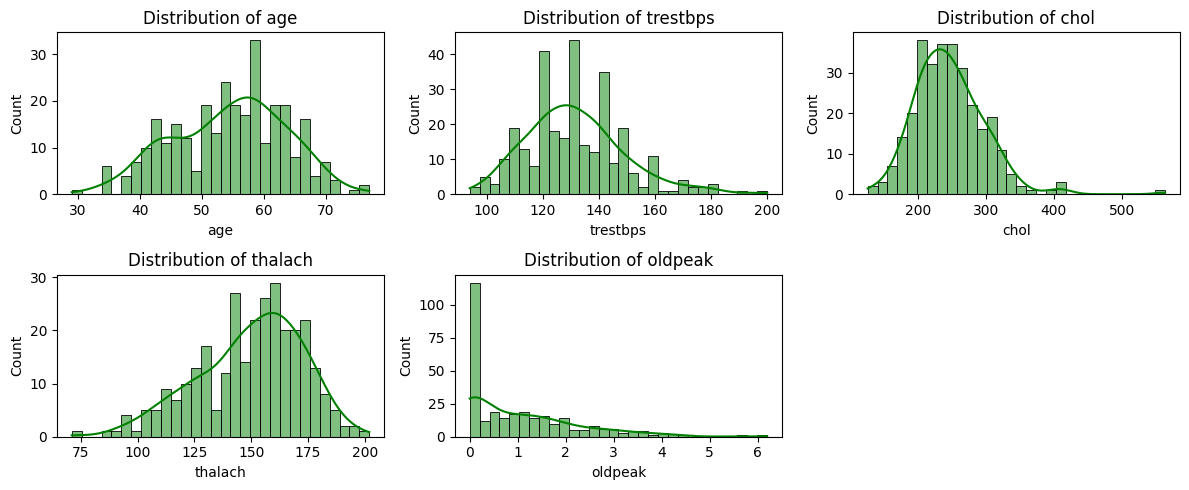

In [17]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols):
  plt.subplot(2, 3, i +1)
  sns.histplot(df[col], kde=True, bins=30, color='green')
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

/tmp/ipython-input-4068046361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='inferno')
/tmp/ipython-input-4068046361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='inferno')
/tmp/ipython-input-4068046361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='inferno')
/tmp/ipython-input-4068046361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=

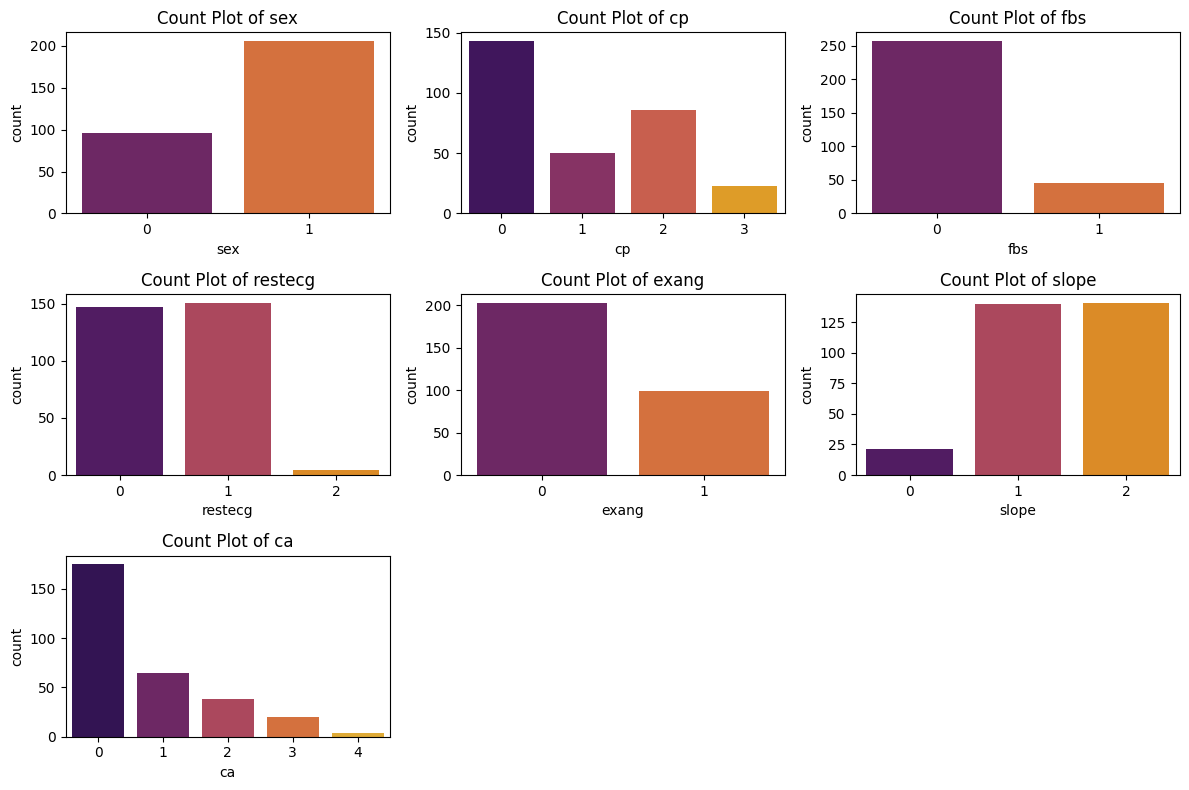

In [18]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols):
  plt.subplot(3, 3, i +1)
  sns.countplot(x=col, data=df, palette='inferno')
  plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

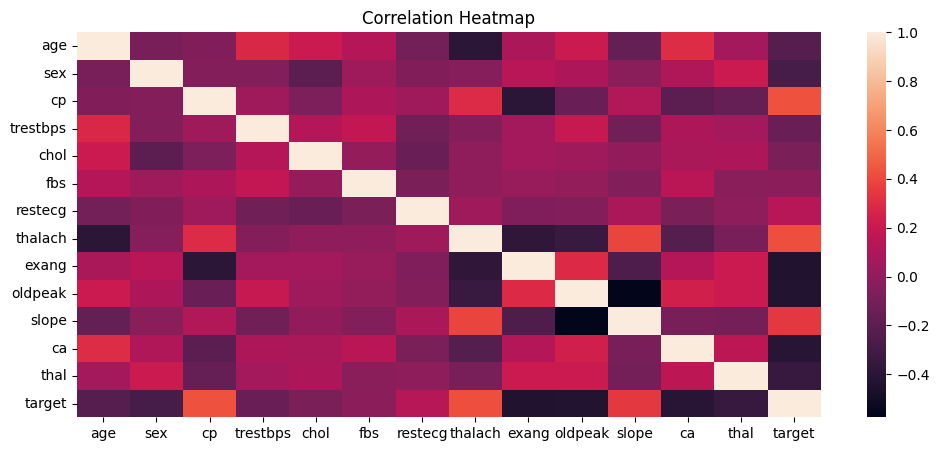

In [19]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(numeric_only=True), annot=False)
plt.title("Correlation Heatmap")
plt.show()

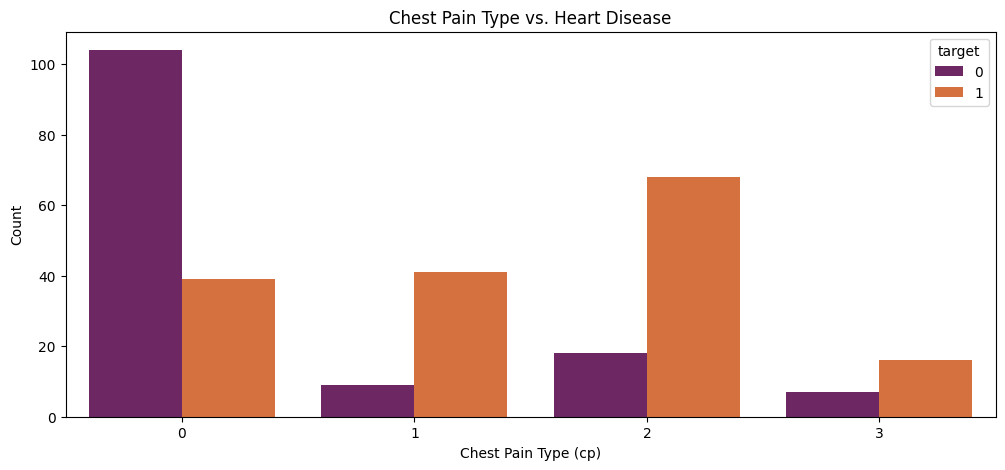

In [20]:
plt.figure(figsize=(12, 5))
sns.countplot(x="cp", hue="target", data=df, palette='inferno')
plt.title("Chest Pain Type vs. Heart Disease")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.show()

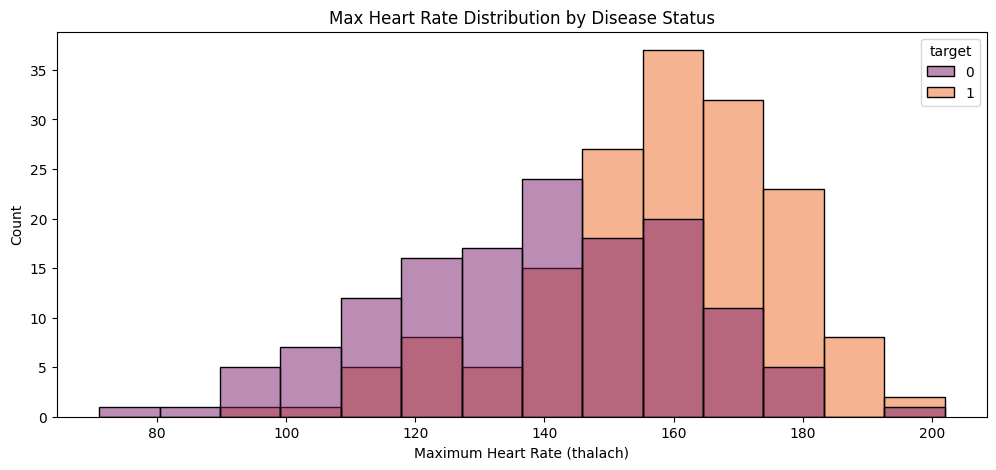

In [21]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x="thalach", hue="target", kde=False, palette='inferno')
plt.title("Max Heart Rate Distribution by Disease Status")
plt.xlabel("Maximum Heart Rate (thalach)")
plt.ylabel("Count")
plt.show()

In [22]:
encoder = OneHotEncoder(sparse_output=False)

In [25]:
X_cat = encoder.fit_transform(X[cat_cols])

In [26]:
X_num = StandardScaler().fit_transform(X[num_cols])

In [24]:
#split the data -- X and y

X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(y_test.unique())

[1 0]


In [28]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

In [29]:
print(round(accuracy_score(y_test, lr_pred), 3))
print(round(precision_score(y_test, lr_pred), 3))
print(round(recall_score(y_test, lr_pred), 3))
print(round(f1_score(y_test, lr_pred), 3))

0.803
0.743
0.897
0.812


In [30]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

In [31]:
print(round(accuracy_score(y_test, rf_pred), 3))
print(round(precision_score(y_test, rf_pred), 3))
print(round(recall_score(y_test, rf_pred), 3))
print(round(f1_score(y_test, rf_pred), 3))

0.852
0.812
0.897
0.852


In [32]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

In [33]:
print(round(accuracy_score(y_test, gb_pred), 3))
print(round(precision_score(y_test, gb_pred), 3))
print(round(recall_score(y_test, gb_pred), 3))
print(round(f1_score(y_test, gb_pred), 3))

0.82
0.781
0.862
0.82


In [34]:
lr_prob = lr.predict_proba(X_test)[:, 1]
rf_prob = rf.predict_proba(X_test)[:, 1]
gb_prob = gb.predict_proba(X_test)[:, 1]

lr_fp, lr_tp, _ = roc_curve(y_test, lr_prob) # false positive, true positive
rf_fp, rf_tp, _ = roc_curve(y_test, rf_prob) # false positive, true positive
gb_fp, gb_tp, _ = roc_curve(y_test, gb_prob) # false positive, true positive

lr_auc = auc(lr_fp, lr_tp)
rf_auc = auc(rf_fp, rf_tp)
gb_auc = auc(gb_fp, gb_tp)

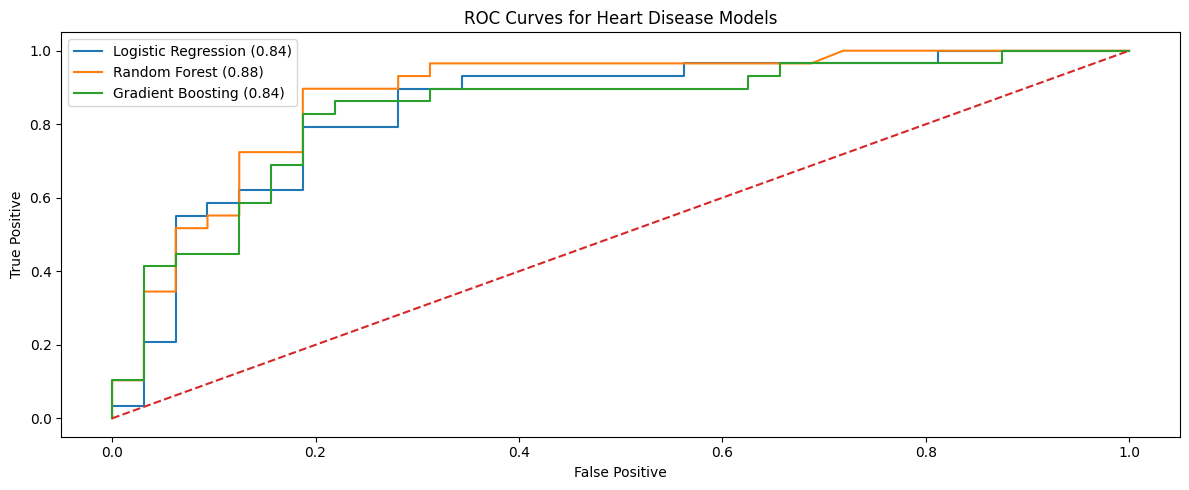

In [44]:
plt.figure(figsize=(12, 5))
plt.plot(lr_fp, lr_tp, label=f"Logistic Regression ({lr_auc:.2f})")
plt.plot(rf_fp, rf_tp, label=f"Random Forest ({rf_auc:.2f})")
plt.plot(gb_fp, gb_tp, label=f"Gradient Boosting ({gb_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curves for Heart Disease Models")
plt.legend()
plt.tight_layout()
plt.show()

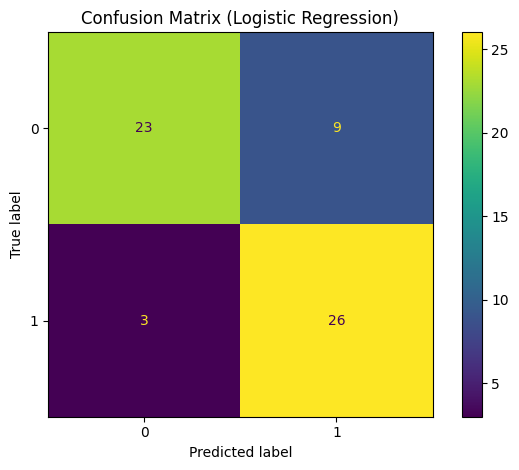

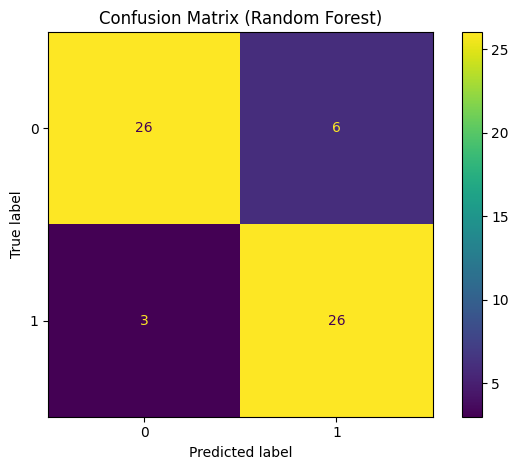

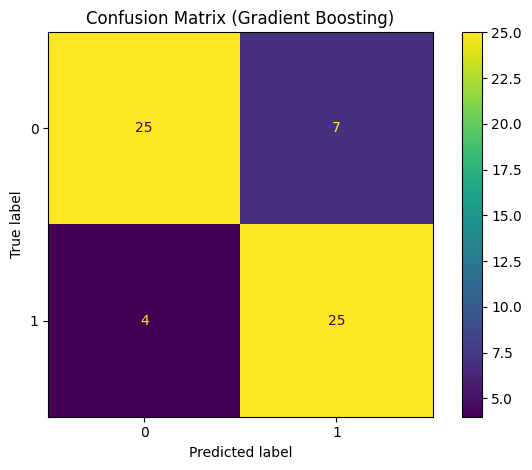

In [40]:
lr_cm = confusion_matrix(y_test, lr_pred)
cmd_lr = ConfusionMatrixDisplay(confusion_matrix=lr_cm)
cmd_lr.plot()
plt.title("Confusion Matrix (Logistic Regression)")
plt.tight_layout()
plt.show()

rf_cm = confusion_matrix(y_test, rf_pred)
cmd_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
cmd_rf.plot()
plt.title("Confusion Matrix (Random Forest)")
plt.tight_layout()
plt.show()

gb_cm = confusion_matrix(y_test, gb_pred)
cmd_gb = ConfusionMatrixDisplay(confusion_matrix=gb_cm)
cmd_gb.plot()
plt.title("Confusion Matrix (Gradient Boosting)")
plt.tight_layout()
plt.show()

In [41]:
num_features = num_cols
cat_features = encoder.get_feature_names_out(cat_cols)

features = list(num_features) + list(cat_features)

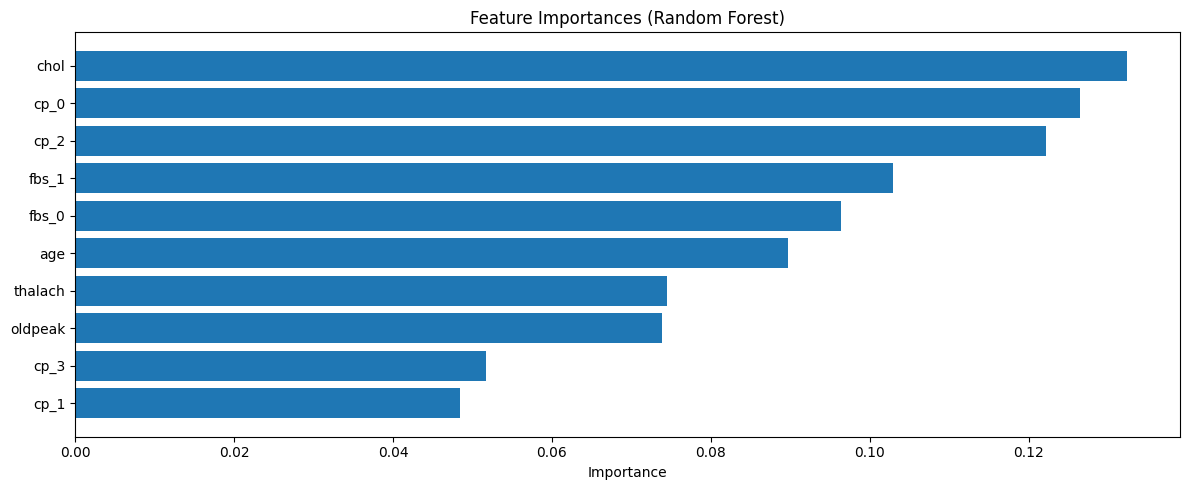

In [42]:
rf_importances = rf.feature_importances_
rf_indices = np.argsort(rf_importances)[-10:]

plt.figure(figsize=(12, 5))
plt.barh(range(len(rf_indices)), rf_importances[rf_indices])
plt.yticks(range(len(rf_indices)), [features[i] for i in rf_indices])
plt.xlabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

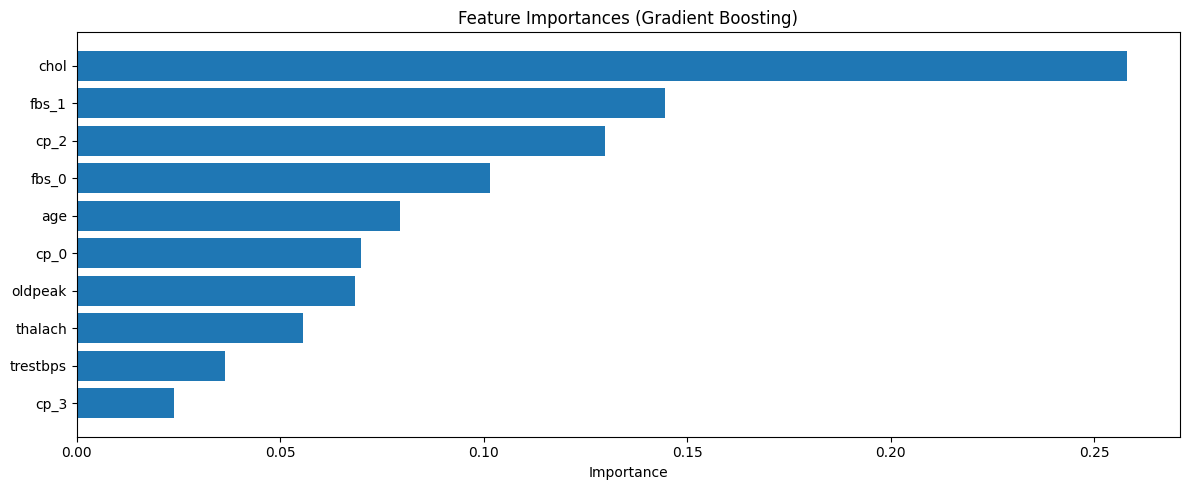

In [43]:
gb_importances = gb.feature_importances_
gb_indices = np.argsort(gb_importances)[-10:]

plt.figure(figsize=(12, 5))
plt.barh(range(len(gb_indices)), gb_importances[gb_indices])
plt.yticks(range(len(gb_indices)), [features[i] for i in gb_indices])
plt.xlabel("Importance")
plt.title("Feature Importances (Gradient Boosting)")
plt.tight_layout()
plt.show()